In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'D:/나눔 글꼴/나눔고딕/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path, size=10)
plt.rc('font', family='NanumGothic')

네이버 영화리뷰

In [3]:
import urllib.request
from konlpy.tag import Mecab
from collections import Counter

tagger = Mecab('C:/Mecab/mecab-ko-dic')

# 영화 리뷰 데이터 불러오기
raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()

# 리뷰 데이터를 리스트형을 변환
raw = [x.decode() for x in raw[1:]]  # 리뷰데이터 디코딩
reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])

# 불용어 사전 생성
stop_words = '영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것'
stop_words = stop_words.split(' ')

# 리뷰 데이터 정제
nouns = []
for review in reviews:
    for noun in tagger.nouns(review):  # 형태소 분석을 통해서 문장을 단어 단위로 바꿈
        if noun not in stop_words:     # 불용어 제거
            nouns.append(noun)

# 제일 많이 쓰인 단어 50개 추출
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))


1. 단어의 시각화

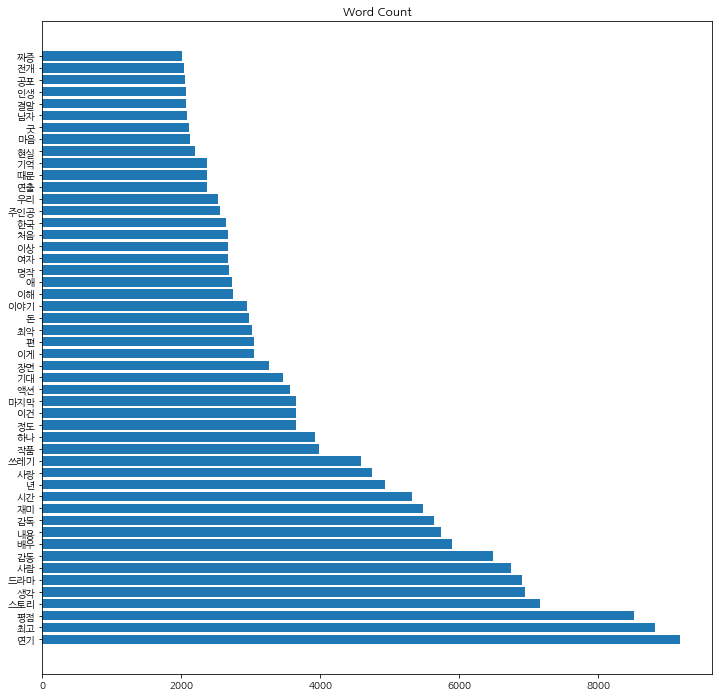

In [5]:
import numpy as np

y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12, 12))
plt.barh(y_pos, top_nouns.values())
plt.title("Word Count")
plt.yticks(y_pos, top_nouns.keys())
plt.show()

2. 워드 클라우드(WordCloud)

   - 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적을 시각화하는 방법
   - 텍스트에 등장하는 단어들 그 등장 빈도에 따라 서로 크기가 다르게 구름 형태로 표현함으로써, 단어의 빈도 수를 한번에 알 수 있음
   - 최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는가를 워드클라우드 형식으로 시각화
   - 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미, 구조 등을 분석하는 데는 한계가 있음

   - 파이썬에서 워드 클라우드를 시각화하기 위해 matplotlib와 WordCloud를 import해서 사용
   - WordCloud는 pip install wordcloud 명령어를 통해 설치 필요

In [6]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='D:/나눔 글꼴/나눔고딕/NanumGothic.ttf')
wc.generate_from_frequencies(top_nouns)   # 워드클라우드 객체 생성

   - 워드클라우드를 시각화 할때는 이미지 시각화 함수인 imshow()가 필요

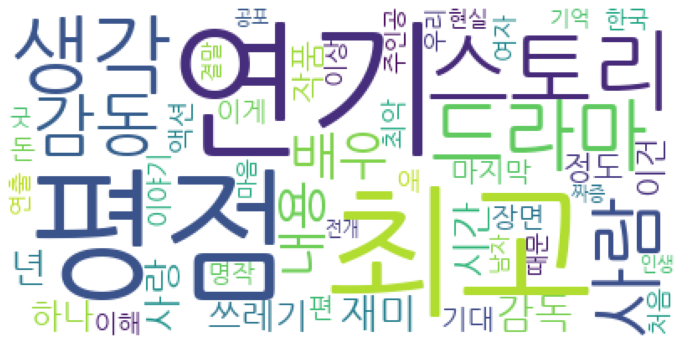

In [7]:
figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)

squarify 트리맵 시각화

   - squarify는 트리맵 생성을 지원해주는 파이썬 라이브러리
   - squarify를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타냄

<AxesSubplot:>

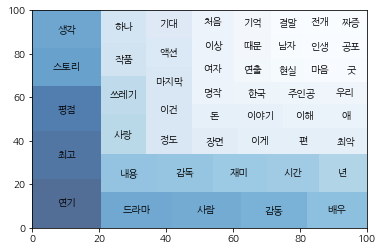

In [5]:
import squarify

norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            vmax=max(top_nouns.values()))

colors = [mpl.cm.Blues(norm(values)) for values in top_nouns.values()]

squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors,
              alpha=.7)